In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dropout_inclass = np.load('../results/fr_uncertainties/ent_laplace_c100.npz')
swagfr_cov_inclass = np.load('../results//fr_uncertainties/ent_swag_300_1.npz')
swag_nocov_inclass = np.load('/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/exps/vgg16_cifar100_0620_1/ent_swag_nocov.pt.npz')

In [18]:
def compute_accuracies_conf(conf, pred, true, bins = None, nbins = 30):
    if bins is None:
        _, bins = np.histogram(conf, nbins)
        
    accuracies = []
    for level in bins:
        conf_gt_level = conf >= level
        level_acc = (pred[conf_gt_level] == true[conf_gt_level]).sum() / conf_gt_level.sum()
        accuracies.append(level_acc)
        
    return accuracies, bins

Text(0.5,1,'VGG16 on CIFAR100')

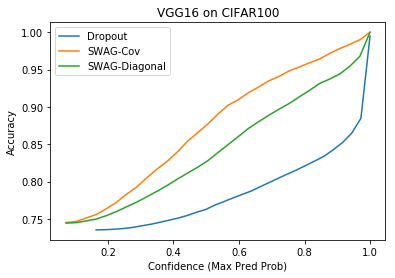

In [20]:
accuracies, bins = compute_accuracies_conf(np.max(dropout_inclass['predictions'],1), 
                                           np.argmax(dropout_inclass['predictions'],1),
                                          dropout_inclass['targets'])
plt.plot(bins, accuracies, label = 'Dropout')

accuracies, bins = compute_accuracies_conf(np.max(swagfr_cov_inclass['predictions'],1), 
                                           np.argmax(swagfr_cov_inclass['predictions'],1),
                                          swagfr_cov_inclass['targets'])
plt.plot(bins, accuracies, label = 'SWAG-Cov')

accuracies, bins = compute_accuracies_conf(np.max(swag_nocov_inclass['predictions'],1), 
                                           np.argmax(swag_nocov_inclass['predictions'],1),
                                          swag_nocov_inclass['targets'])
plt.plot(bins, accuracies, label = 'SWAG-Diagonal')


plt.xlabel('Confidence (Max Pred Prob)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('VGG16 on CIFAR100')